# Data exploration
 En este archivo se realiza toda la exploración y análisis de las bases de datos seleccionadas para el proyecto.

Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Data exploration process

### Cargue de los datasets

In [2]:
from data_quality import cargue_datasets
casos, edu_vial2018, encuesta_calidad, encuesta_cultura, hurto_tp, lesion_nf, mede_victimas, traffic, compar = cargue_datasets()

c:\Users\asus\OneDrive - Universidad de la Sabana\Trabajos Universidad\Semestre 8\Proyecto en analítica aplicada\Proyecto_analitica_aplicada\data_quality.py:32: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,11,12,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  mede_victimas=pd.read_csv(mede_victimas_ruta, delimiter=";", encoding="utf-8")
c:\Users\asus\OneDrive - Universidad de la Sabana\Trabajos Universidad\Semestre 8\Proyecto en analítica aplicada\Proyecto_analitica_aplicada\data_quality.py:34: DtypeWarning: Columns (8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  compar=pd.read_csv(compar_ruta, delimiter=";", encoding="utf-8")


### Análisis de casos de delitos

In [3]:
# Tratamiento del dataset
from data_quality import casos_treatment
casos=casos_treatment(casos)

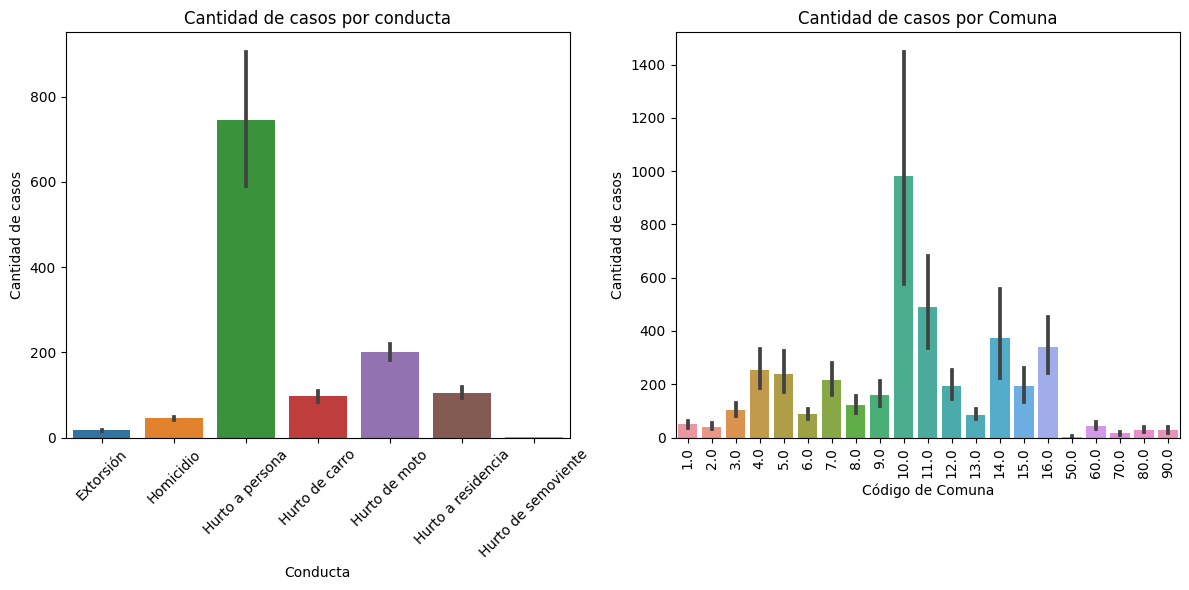

In [4]:
# Figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras: Cantidad de casos por conducta
sns.barplot(x='Conducta', y='Cantidad_casos', data=casos, ax=axes[0])
axes[0].set_title('Cantidad de casos por conducta')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_xlabel('Conducta')
axes[0].set_ylabel('Cantidad de casos')

# Gráfico de barras: Cantidad de casos por comuna
sns.barplot(x='Comuna', y='Cantidad_casos', data=casos, ax=axes[1])
axes[1].set_title('Cantidad de casos por Comuna')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_xlabel('Código de Comuna')
axes[1].set_ylabel('Cantidad de casos')

plt.tight_layout()
plt.show()


##### A primera vista de este dataset podemos observar que la conducta que más registra casos de delitos es el hurto, a este le siguen los hurtos a vehículos y a residencias. En cuanto a los delitos reportados podemos ver que la mayoría se dan en la comuna 10 "La Candelaria", esto podría deberse a su centralidad en la ciudad de Medellín y a que es una zona donde se ubican varias empresas, y por lo tanto, los trabajadores se movilizan mucho por esa zona.

### Análisis de eduación vial 2018

In [5]:
from data_quality import edu_vial2018_treatment
edu_vial2018=edu_vial2018_treatment(edu_vial2018)

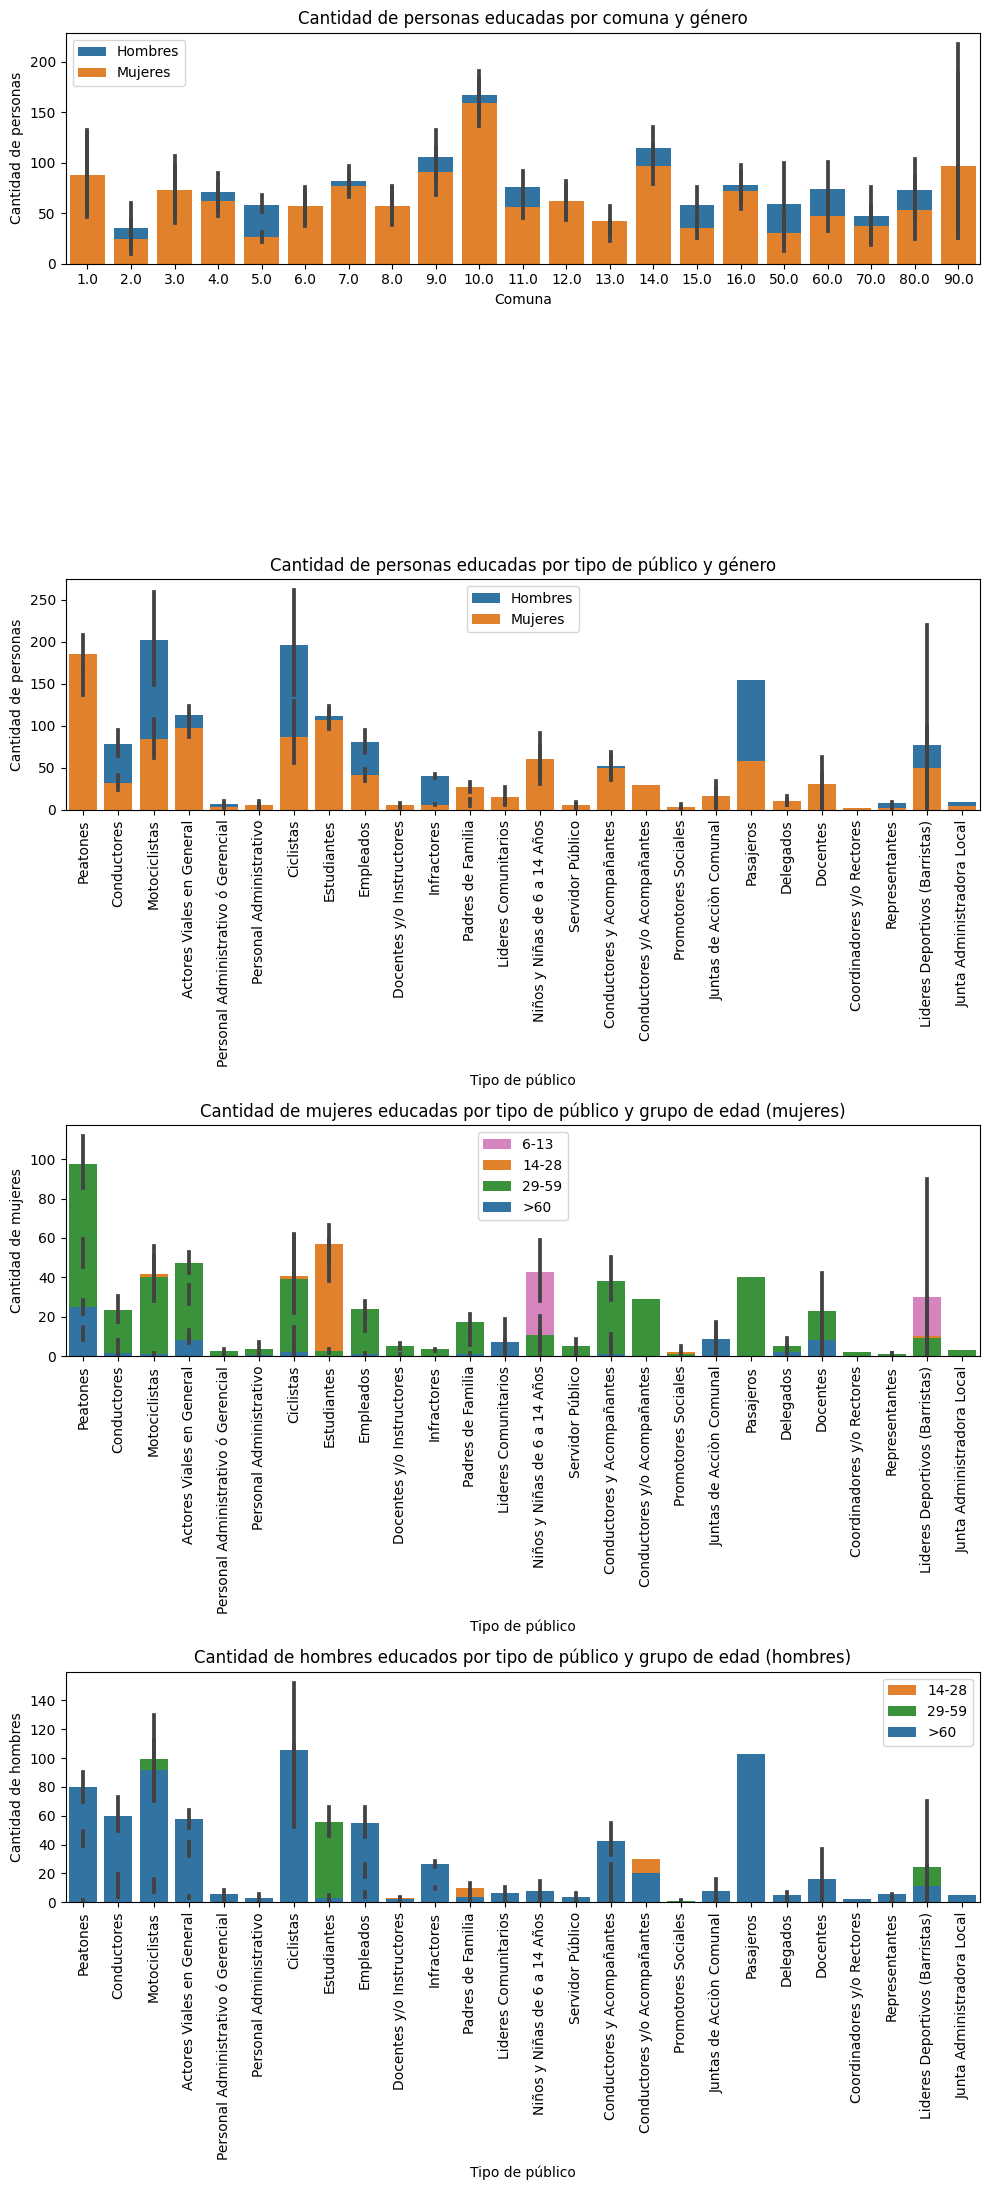

In [6]:
# Figura con tres subplots (4 filas, 1 columna)
fig, axes = plt.subplots(4, 1, figsize=(10, 22))

#Gráfico de barras: Cantidad de personas por comuna y por género
sns.barplot(x='Comuna', y='N_hombres', data=edu_vial2018, color='tab:blue', label='Hombres', ax=axes[0])
sns.barplot(x='Comuna', y='N_mujeres', data=edu_vial2018, color='tab:orange', label='Mujeres', ax=axes[0])
axes[0].set_title('Cantidad de personas educadas por comuna y género')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_xlabel('Comuna')
axes[0].set_ylabel('Cantidad de personas')
axes[0].legend()

# Gráfico de barras: Cantidad de personas educadas por tipo de público y género
sns.barplot(x='Publico', y='N_hombres', data=edu_vial2018, color='tab:blue', label='Hombres', ax=axes[1])
sns.barplot(x='Publico', y='N_mujeres', data=edu_vial2018, color='tab:orange', label='Mujeres', ax=axes[1])
axes[1].set_title('Cantidad de personas educadas por tipo de público y género')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_xlabel('Tipo de público')
axes[1].set_ylabel('Cantidad de personas')
axes[1].legend()

# Gráfico de rangos de edad para mujeres
sns.barplot(x='Publico', y='N_mujeres (6-13)', data=edu_vial2018, color='tab:pink', label='6-13', ax=axes[2])
sns.barplot(x='Publico', y='N_mujeres (14-28)', data=edu_vial2018, color='tab:orange', label='14-28', ax=axes[2])
sns.barplot(x='Publico', y='N_mujeres (29-59)', data=edu_vial2018, color='tab:green', label='29-59', ax=axes[2])
sns.barplot(x='Publico', y='N_mujeres (>60)', data=edu_vial2018, color='tab:blue', label='>60', ax=axes[2])
axes[2].set_title('Cantidad de mujeres educadas por tipo de público y grupo de edad (mujeres)')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[2].set_xlabel('Tipo de público')
axes[2].set_ylabel('Cantidad de mujeres')
axes[2].legend()

# Gráfico de rangos de edad para hombres
sns.barplot(x='Publico', y='N_hombres (14-28)', data=edu_vial2018, color='tab:orange', label='14-28', ax=axes[3])
sns.barplot(x='Publico', y='N_hombres (29-59)', data=edu_vial2018, color='tab:green', label='29-59', ax=axes[3])
sns.barplot(x='Publico', y='N_hombres (>60)', data=edu_vial2018, color='tab:blue', label='>60', ax=axes[3])
axes[3].set_title('Cantidad de hombres educados por tipo de público y grupo de edad (hombres)')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)
axes[3].set_xlabel('Tipo de público')
axes[3].set_ylabel('Cantidad de hombres')
axes[3].legend()

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()


##### De este dataset podemos evidenciar nuevamente como la comuna 10 es la que tiene mayor cantidad de registros, en este caso de sesiones de educación vial, adicionalmente vemos que en su mayoría son mujeres las que asisten a estas capacitaciones. Del tipo de público al que iban dirigidas estas capacitaciones las principales eran los peatones, motociclistas, ciclistas y pasajeros, lo que podría indicarnos que estos grupos son bastante vulnerables en las vías, que son los que más se ven expuestos o que son los más imprudentes. 
##### Si analizamos los grupos de edad de muejres y hombres podemos observar que la mayoría de muejeres están en el rango de 29-59, salvo en estudiantes, que en su mayoría es de 14 a 28, coincidiendo con la realidad de este grupo. En cuanto a los hombres el panorama es baastante diferente, casi todos los asistentes eran mayores de 60 años, salvo en el grupo de estudiantes. Esto podría deberse a temas de renovación de licencias o multas. 
##### ¿Significa esto que los hombres sufren de menos accientes viales o que estos no consideran necesarias o útiles estas capacitaciones?

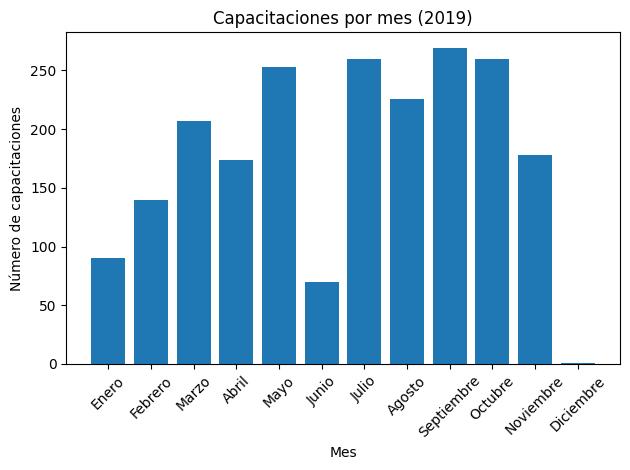

In [7]:
# Capacitaciones por mes
df=edu_vial2018
df['mes'] = edu_vial2018['Fecha'].dt.month
datos_por_mes = df['mes'].value_counts().sort_index()
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.bar(datos_por_mes.index, datos_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Número de capacitaciones')
plt.title('Capacitaciones por mes (2019)')
plt.xticks(datos_por_mes.index, labels=nombres_meses, rotation=45)
plt.tight_layout()
plt.show()

##### En cuanto a las capacitaciones por mes, vemos que estas mantienen un número similar a lo largo del año, salvo en Enero, Junio y Diciembre. Coincidiendo con meses "festivos".

### Comparendos

In [8]:
from data_quality import compar_treatment
compar=compar_treatment(compar)

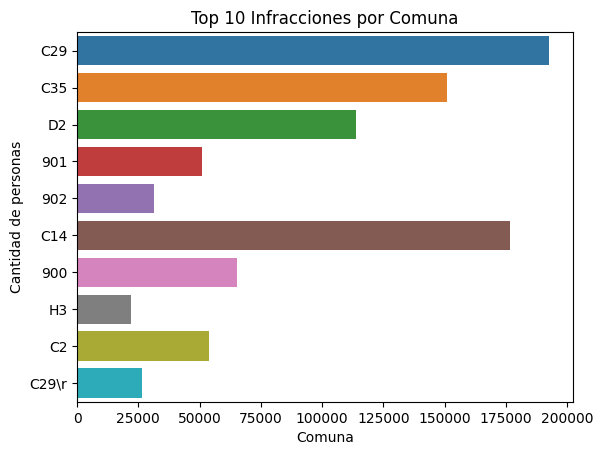

In [9]:
#Tipo de infracciones por comuna
top_infracciones = compar['Infracción'].value_counts().head(10).index
compar_top10 = compar[compar['Infracción'].isin(top_infracciones)]
sns.barplot(x='Comuna', y='Infracción', data=compar_top10, estimator=len, errorbar=None)
plt.title('Top 10 Infracciones por Comuna')
plt.xticks(rotation=0)
plt.xlabel('Comuna')
plt.ylabel('Cantidad de personas')
plt.show()

##### Al ver los 10 tipos de infracciones con más registros los que sobresalen de los demás son C29 que corresponde a exceso de velocidad, C35 que corresponde a no contar con la tecno-mecánica al día, C14 que es transitar por sitios prohibidos u horarios restringidos, y D2 que refiere a conducir sin los seguros requeridos por la ley. 

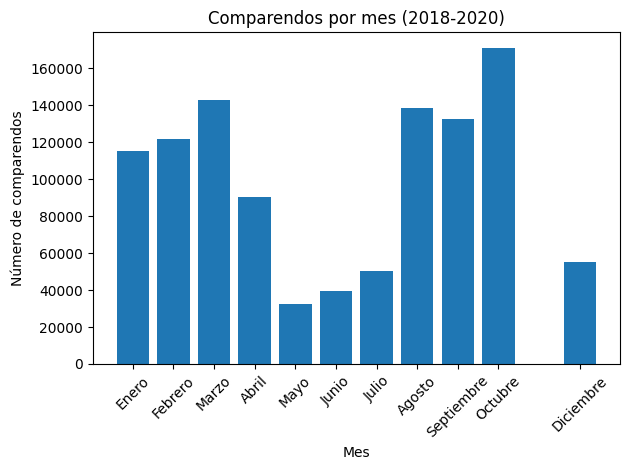

In [10]:
df=compar
df['mes'] = compar['Fecha'].dt.month
datos_por_mes = df['mes'].value_counts().sort_index()
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Diciembre']
plt.bar(datos_por_mes.index, datos_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Número de comparendos')
plt.title('Comparendos por mes (2018-2020)')
plt.xticks(datos_por_mes.index, labels=nombres_meses, rotation=45)
plt.tight_layout()
plt.show()


##### En general se aprecia que la cantidad de comparendos en este dataset es regular, exceptuando Mayo, Junio, Julio y Diciembre. También es de resaltar que el dataset no contiene información del mes de Noviembre, se podría concluir que las personas son más prudentes en ese mes o que por algún motivo inexplicable no han sido registrados estos comparendos 

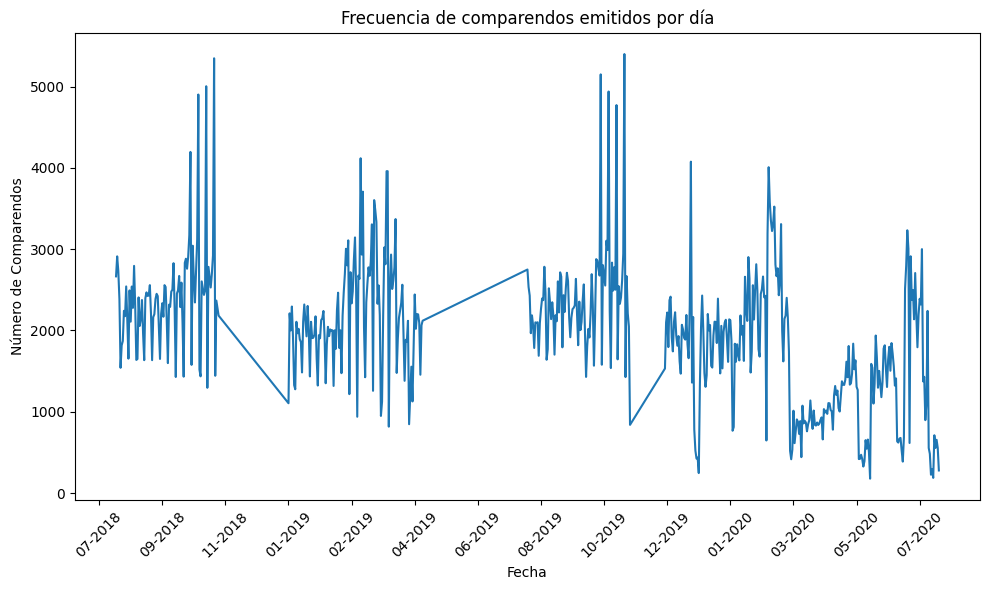

In [11]:
daily_counts = compar['Fecha'].value_counts().sort_index()
plt.figure(figsize=(10, 6))

plt.plot(daily_counts.index, daily_counts.values)
plt.title('Frecuencia de comparendos emitidos por día')
plt.xlabel('Fecha')
plt.ylabel('Número de Comparendos')

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### Si lo vemos de manera más general, el comportamiento a lo largo de los años es bastante similar salvo en 2020 por temas de COVID.

### Hurto en transporte público 

In [12]:
from data_quality import hurto_tp_treatment
hurto_tp=hurto_tp_treatment(hurto_tp)

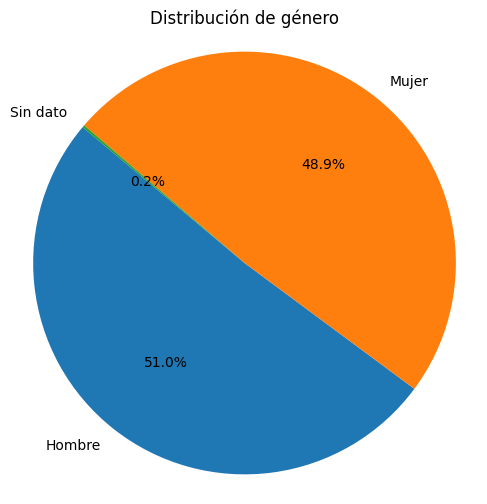

<Figure size 800x500 with 0 Axes>

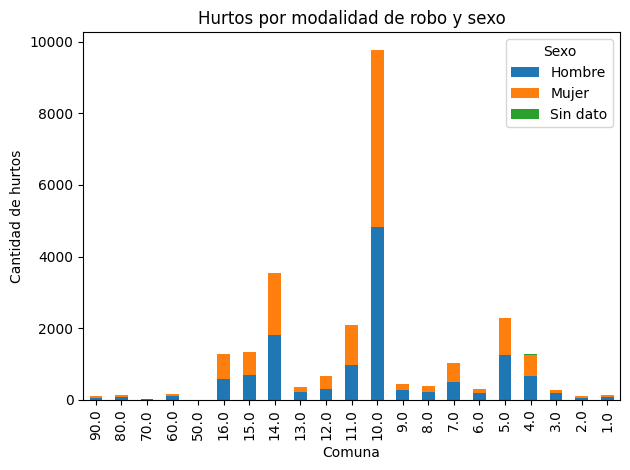

<Figure size 800x600 with 0 Axes>

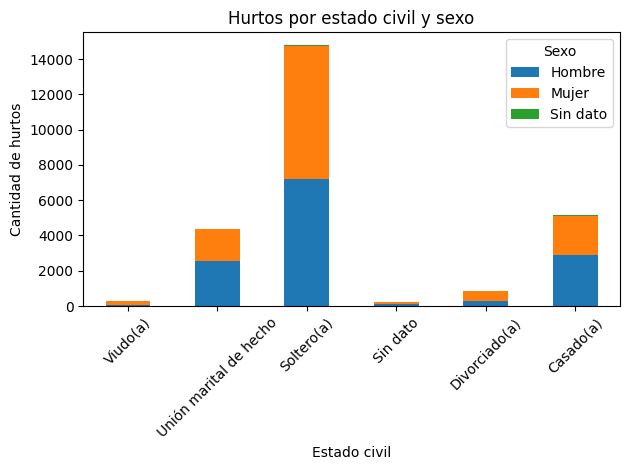

<Figure size 800x500 with 0 Axes>

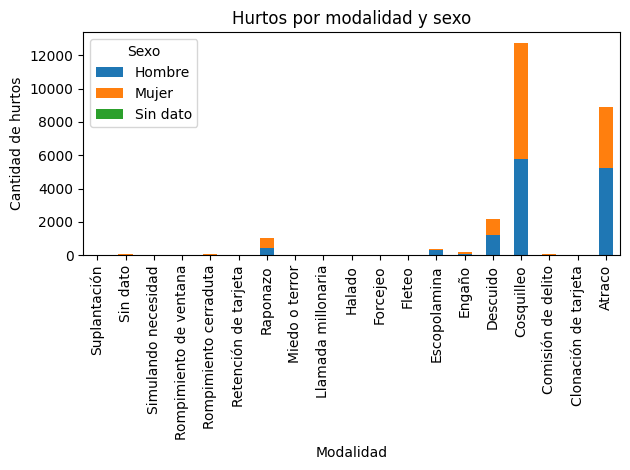

<Figure size 800x500 with 0 Axes>

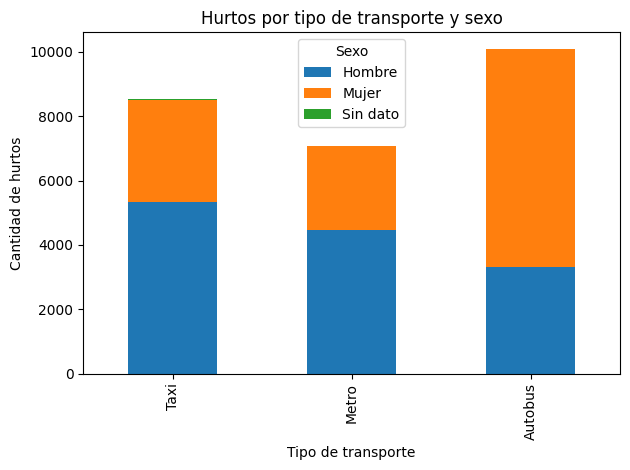

<Figure size 1000x600 with 0 Axes>

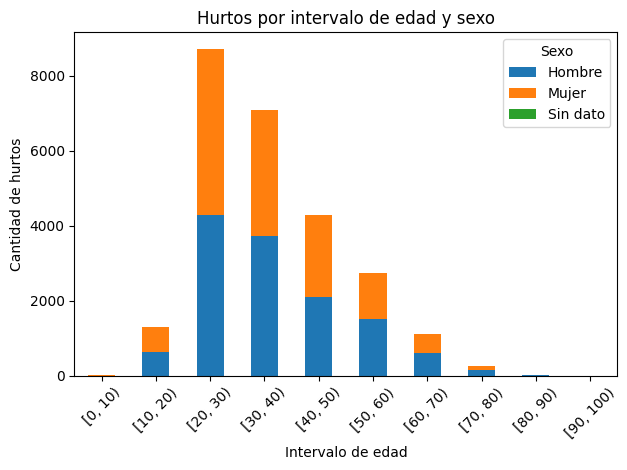

In [13]:
#Gráfico de torta: Proporción de sexos en el dataset
cantidad_por_sexo = hurto_tp['Sexo'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(cantidad_por_sexo, labels=cantidad_por_sexo.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de género')
plt.axis('equal')
plt.show()

#Gráfica de barras: Hurtos por comuna y sexo
robos_por_comuna_sexo = hurto_tp.groupby(['Comuna', 'Sexo']).size().unstack()
robos_por_comuna_sexo = robos_por_comuna_sexo.sort_values(by='Comuna', ascending=False)
plt.figure(figsize=(8, 5))
robos_por_comuna_sexo.plot(kind='bar', stacked=True)
plt.title('Hurtos por modalidad de robo y sexo')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de hurtos')
plt.xticks(rotation=90)
plt.tight_layout()

#Gráfico de barras apiladas: hurto por estado civil y sexo
robos_por_estado_sexo = hurto_tp.groupby(['Estado_civil', 'Sexo']).size().unstack()
robos_por_estado_sexo = robos_por_estado_sexo.sort_values(by='Estado_civil', ascending=False)
plt.figure(figsize=(8, 6))
robos_por_estado_sexo.plot(kind='bar', stacked=True)
plt.title('Hurtos por estado civil y sexo')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de hurtos')
plt.xticks(rotation=45)
plt.tight_layout()

#Gráfico de barras: hurto por modalidad
robos_por_moda_sexo = hurto_tp.groupby(['Modalidad', 'Sexo']).size().unstack()
robos_por_moda_sexo = robos_por_moda_sexo.sort_values(by='Modalidad', ascending=False)
plt.figure(figsize=(8, 5))
robos_por_moda_sexo.plot(kind='bar', stacked=True)
plt.title('Hurtos por modalidad y sexo')
plt.xlabel('Modalidad')
plt.ylabel('Cantidad de hurtos')
plt.xticks(rotation=90)
plt.tight_layout()

#Gráfica de barras: Hurtos por medio de transporte y sexo
robos_por_trans_sexo = hurto_tp.groupby(['Transporte', 'Sexo']).size().unstack()
robos_por_trans_sexo = robos_por_trans_sexo.sort_values(by='Transporte', ascending=False)
plt.figure(figsize=(8, 5))
robos_por_trans_sexo.plot(kind='bar', stacked=True)
plt.title('Hurtos por tipo de transporte y sexo')
plt.xlabel('Tipo de transporte')
plt.ylabel('Cantidad de hurtos')
plt.xticks(rotation=90)
plt.tight_layout()

#Gráfica de barras: Hurtos por edad
edades_intervalos = pd.cut(hurto_tp['Edad'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], right=False)
hurto_tp['Edad_intervalo'] = edades_intervalos
robos_por_edad_sexo = hurto_tp.groupby(['Edad_intervalo', 'Sexo']).size().unstack()
plt.figure(figsize=(10, 6))
robos_por_edad_sexo.plot(kind='bar', stacked=True)
plt.title('Hurtos por intervalo de edad y sexo')
plt.xlabel('Intervalo de edad')
plt.ylabel('Cantidad de hurtos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### De este conjunto de datasets podemos concluir que el sexo no parece ser una variable relevante en los hurtos en transporte público, pues en todas las gráficas la distribución es muy similar. Nuevamente nos encontramos con que la comuna 10 es la que tiene la mayor cantidad de registros, también podemos observar que la mayoría de victimas son solteros, puede ser debido a que este es el grupo (en referencia a estado civil) que más utiliza transporte público, pues las parejas ya consolidadas probablemente opten por usar vehículos propios o servicios como Uber. 
##### También se aprecia que la modalidad de hurto principal es el cosquilleo y el atraco, métodos casi opuestos, pues uno busca ser discreto con la víctima y otro atemorizarla para que entregue sus pertenencias. 
##### Se puede observar además que el medio de transporte parece no tener una incidencia en la cantidad de hurtos. Y finalmente, vemos que los grupos poblacionales más afectados son las personas entre 20 y 40, nuevamente porque son el grupo poblacional que más utiliza este tipo de transporte.

### Victimas de Incidentes Viales en Medellín

In [14]:
from data_quality import medevic_treatment
mede_victimas=medevic_treatment(mede_victimas)

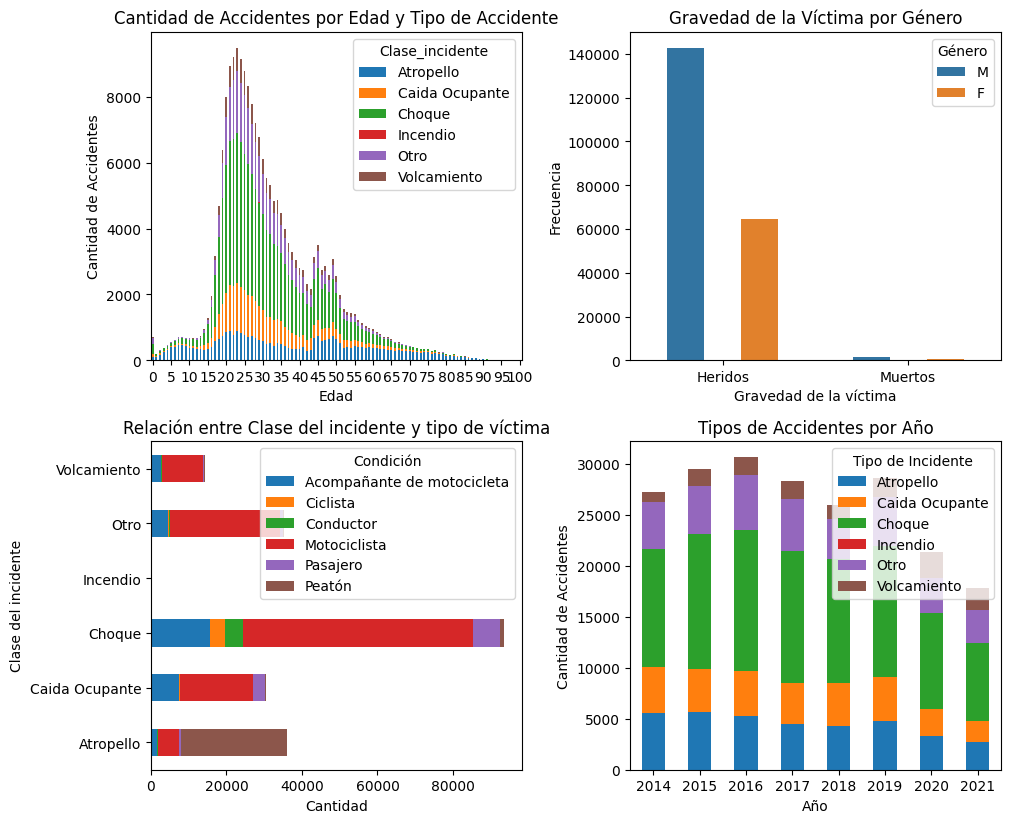

In [15]:
from matplotlib.gridspec import GridSpec

# Crear la cuadrícula de subplots con 3 filas y 1 columna
gs = GridSpec(3, 3)

# Crear la figura y los subplots usando la cuadrícula
fig = plt.figure(figsize=(15, 12))

# Subplot 1: Gráfico de frecuencia y tipo de accidente por edad
ax1 = fig.add_subplot(gs[0, 0])
# Agrupar por edad y tipo de accidente, y contar las ocurrencias
grouped = mede_victimas.groupby(['Edad', 'Clase_incidente']).size().unstack()
# Crear una barra para cada tipo de accidente
ax1 = grouped.plot(kind='bar', stacked=True,ax=ax1)
ax1.set_title('Cantidad de Accidentes por Edad y Tipo de Accidente')
ax1.set_xlabel('Edad')
ax1.set_ylabel('Cantidad de Accidentes')
ax1.set_xticks(range(0, len(grouped.index), 5), grouped.index[::5], rotation=0)


# Subplot 2: Relación entre gravedad de la víctima y género
ax2 = fig.add_subplot(gs[0, 1])
plot = sns.countplot(x='Gravedad_victima', hue='Sexo', data=mede_victimas, ax=ax2)
ax2.set_xlabel('Gravedad de la víctima')
ax2.set_ylabel('Frecuencia')
total_bars = len(plot.patches)
width = 0.1 if len(mede_victimas['Gravedad_victima'].unique()) > 2 else 0.2
for bar in plot.patches:
    current_width = bar.get_width()
    diff = current_width - width
    bar.set_width(width)
    bar.set_x(bar.get_x() + diff * 0.5)
ax2.set_ylim(0, ax2.get_ylim()[1])
ax2.set_title('Gravedad de la Víctima por Género')
ax2.legend(title='Género')

# Subplot 3: Gráfico de barras agrupadas horizontal
ax3 = fig.add_subplot(gs[1, 0])
incident_condition_counts = mede_victimas.groupby(['Clase_incidente', 'Condicion']).size().reset_index(name='Cantidad')
pivot_data = incident_condition_counts.pivot(index='Clase_incidente', columns='Condicion', values='Cantidad')
pivot_data.plot(kind='barh', stacked=True, ax=ax3)
ax3.set_xlabel('Cantidad')
ax3.set_ylabel('Clase del incidente')
ax3.set_title('Relación entre Clase del incidente y tipo de víctima')
ax3.legend(title='Condición')

#Subplot 4
ax4 = fig.add_subplot(gs[1, 1])
grouped = mede_victimas.groupby(['Año', 'Clase_incidente']).size().unstack(fill_value=0)
# Crear un gráfico de barras apiladas
ax4 = grouped.plot(kind='bar', stacked=True, ax=ax4)
ax4.set_ylabel('Cantidad de Accidentes')
ax4.set_xlabel('Año')
ax4.set_title('Tipos de Accidentes por Año')
ax4.legend(title='Tipo de Incidente')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)


# Ajustar el espacio entre los subplots y mostrar la figura
plt.tight_layout()
plt.show()

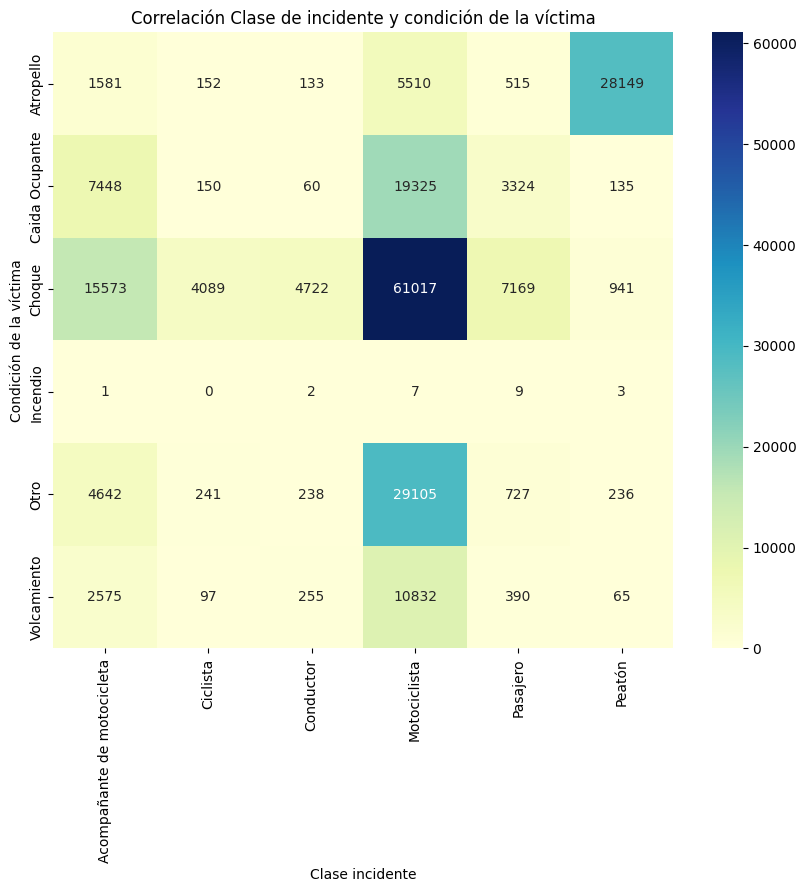

In [16]:
cross_tab = pd.crosstab(mede_victimas['Clase_incidente'], mede_victimas['Condicion'])
# Crea un gráfico de matriz de asociación utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Correlación Clase de incidente y condición de la víctima')
plt.xlabel('Clase incidente')
plt.ylabel('Condición de la víctima')
plt.show()

##### La media de víctmas de accidentes viáles son personas que se encuentran entre los 16 a 35 años, siendo el mayor tipo de accidente registrado Choques. El tipo de víctima más recurrente es Motociclista, siendo siendo el mayor afectado en todos los tipos de accidentes, excepto Choque. La mayor cantidad de víctimas registradas han sido hombres, además de ésto se puede apreciar una reducción en la frecuencia de accidentes a partir del 2020, en consecuencia de la pandemia y las restricciones sociales que esta impuso.

#### Análisis de tráfico

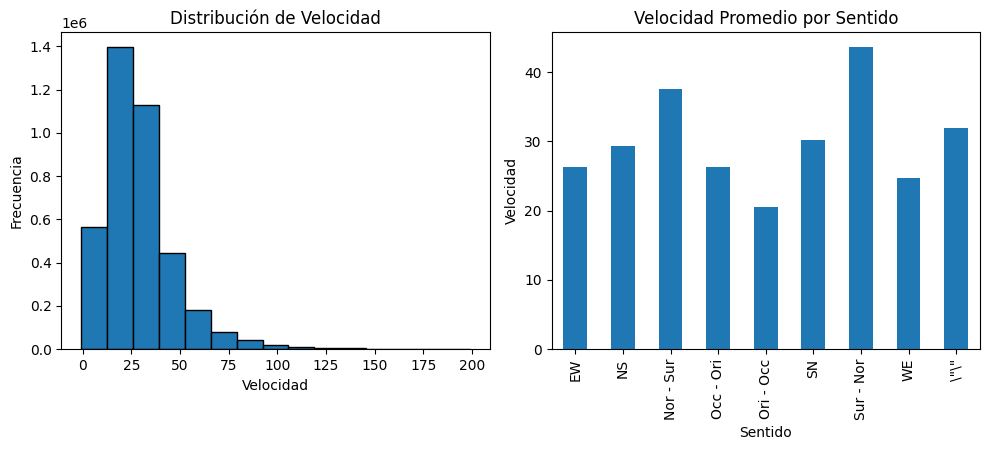

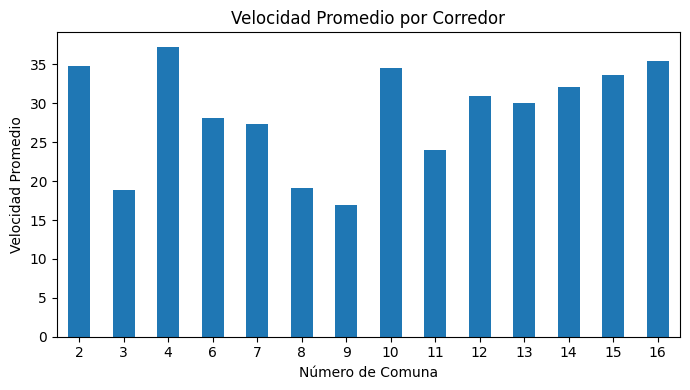

In [17]:
from data_quality import traffic_treatment
traffic=traffic_treatment(traffic)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# Subplot 3: Distribución de velocidad
traffic['VELOCIDAD'].plot(kind='hist', ax=axes[0], bins=15, edgecolor='black')
axes[0].set_title('Distribución de Velocidad')
axes[0].set_xlabel('Velocidad')
axes[0].set_ylabel('Frecuencia')

# Subplot 4: Velocidad por sentido
traffic.groupby('SENTIDO')['VELOCIDAD'].mean().plot(kind='bar', ax=axes[1])
axes[1].set_title('Velocidad Promedio por Sentido')
axes[1].set_ylabel('Velocidad')
axes[1].set_xlabel('Sentido')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

average_speed_by_corridor = traffic.groupby('Comuna')['VELOCIDAD'].mean()
# Crea la gráfica
plt.figure(figsize=(7, 4))
average_speed_by_corridor.plot(kind='bar')
plt.title('Velocidad Promedio por Corredor')
plt.xlabel('Número de Comuna')
plt.ylabel('Velocidad Promedio')
plt.xticks(rotation=0)
plt.tight_layout()

Las 5 comunas con mayor cantidad de tráfico registrado son la 4, 16, 10, 2 y 15. Se puede indetificar que la mayor velocidad pomedio se encuentra en los 25km/h pobablemte debido a la ubicación de los dispositivos de registro.